# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | okhotsk
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | vila franca do campo
Processing Record 6 of Set 1 | kandi
Processing Record 7 of Set 1 | kamaishi
Processing Record 8 of Set 1 | port blair
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | filingue
Processing Record 15 of Set 1 | locri
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | lapua
Processing Record 19 of Set 1 | atherton
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | sai

Processing Record 39 of Set 4 | ndiekro
City not found. Skipping...
Processing Record 40 of Set 4 | kroya
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | itarema
Processing Record 44 of Set 4 | amderma
City not found. Skipping...
Processing Record 45 of Set 4 | natal
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | grand gaube
Processing Record 48 of Set 4 | lincoln
Processing Record 49 of Set 4 | meulaboh
Processing Record 0 of Set 5 | miranorte
City not found. Skipping...
Processing Record 1 of Set 5 | buqayq
City not found. Skipping...
Processing Record 2 of Set 5 | husavik
Processing Record 3 of Set 5 | richards bay
Processing Record 4 of Set 5 | cockburn town
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | fallon
Processing Record 9 of Set 5 | batsfjord


Processing Record 24 of Set 8 | kodyma
Processing Record 25 of Set 8 | serdobsk
Processing Record 26 of Set 8 | jumla
Processing Record 27 of Set 8 | jiazi
Processing Record 28 of Set 8 | igrim
Processing Record 29 of Set 8 | bandraboua
Processing Record 30 of Set 8 | manokwari
Processing Record 31 of Set 8 | omboue
Processing Record 32 of Set 8 | merauke
Processing Record 33 of Set 8 | imphal
Processing Record 34 of Set 8 | naze
Processing Record 35 of Set 8 | atar
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | beringovskiy
Processing Record 38 of Set 8 | shelburne
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | caconda
Processing Record 42 of Set 8 | listvyanskiy
Processing Record 43 of Set 8 | krasnoselkup
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | koroni
Processing Record 46 of Set 8 | dubti
Processing Record 47 of Set 8 | uddevalla
Processing Record 48 of Set 8 | fil

Processing Record 14 of Set 12 | san fernando
Processing Record 15 of Set 12 | kungurtug
Processing Record 16 of Set 12 | vendome
Processing Record 17 of Set 12 | thinadhoo
Processing Record 18 of Set 12 | huangmei
Processing Record 19 of Set 12 | zyryanka
Processing Record 20 of Set 12 | san cristobal
Processing Record 21 of Set 12 | kangaatsiaq
Processing Record 22 of Set 12 | coahuayana
Processing Record 23 of Set 12 | alofi
Processing Record 24 of Set 12 | wonthaggi
Processing Record 25 of Set 12 | mapiri
Processing Record 26 of Set 12 | murchison
Processing Record 27 of Set 12 | olafsvik
Processing Record 28 of Set 12 | sayansk
Processing Record 29 of Set 12 | mercedes
Processing Record 30 of Set 12 | saleaula
City not found. Skipping...
Processing Record 31 of Set 12 | yima
Processing Record 32 of Set 12 | kouqian
Processing Record 33 of Set 12 | rudnichnyy
Processing Record 34 of Set 12 | san juan
Processing Record 35 of Set 12 | uvira
Processing Record 36 of Set 12 | tabuk
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,296.37,72,81,5.81,ZA,1669903460
1,ushuaia,-54.8000,-68.3000,281.98,85,100,4.62,AR,1669903259
2,okhotsk,59.3833,143.3000,253.47,99,100,4.41,RU,1669903538
3,hilo,19.7297,-155.0900,300.53,92,100,3.09,US,1669903538
4,vila franca do campo,37.7167,-25.4333,290.48,69,38,3.02,PT,1669903511


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,296.37,72,81,5.81,ZA,1669903460
1,ushuaia,-54.8000,-68.3000,281.98,85,100,4.62,AR,1669903259
2,okhotsk,59.3833,143.3000,253.47,99,100,4.41,RU,1669903538
3,hilo,19.7297,-155.0900,300.53,92,100,3.09,US,1669903538
4,vila franca do campo,37.7167,-25.4333,290.48,69,38,3.02,PT,1669903511


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

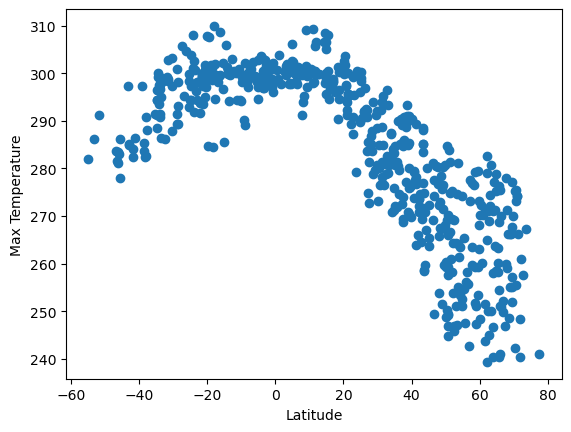

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

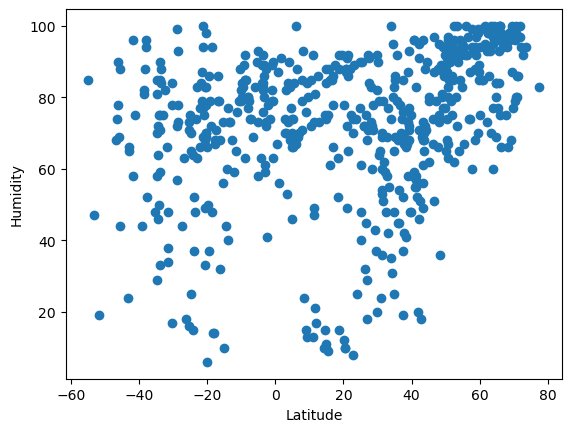

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

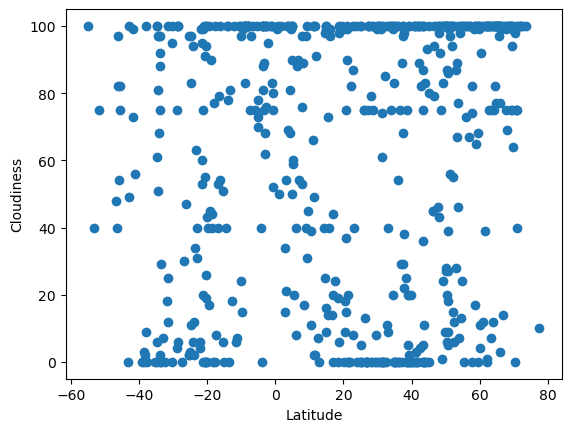

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

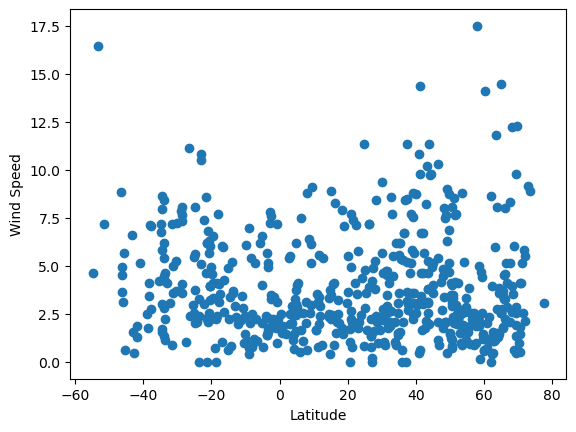

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    values = (slope * x) + intercept
    line_eq = f"y = {slope}x + {intercept}"
    return print(f"The r-value is: {rvalue}"), print(f"The linear regression line's formula is: {line_eq}"), plt.scatter(x, y), plt.plot(x, values, "r-")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
not_north = []
for x in range(len(city_data_df)):
    if city_data_df["Lat"][x] < 0:
        not_north.append(x)

northern_hemi_df = city_data_df.drop(not_north)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,okhotsk,59.3833,143.3000,253.47,99,100,4.41,RU,1669903538
3,hilo,19.7297,-155.0900,300.53,92,100,3.09,US,1669903538
4,vila franca do campo,37.7167,-25.4333,290.48,69,38,3.02,PT,1669903511
5,kandi,11.1342,2.9386,309.32,13,66,0.77,BJ,1669903538
6,kamaishi,39.2667,141.8833,275.85,71,20,2.49,JP,1669903539


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
not_south = []
for x in range(len(city_data_df)):
    if city_data_df["Lat"][x] >= 0:
        not_south.append(x)

southern_hemi_df = city_data_df.drop(not_south)
        
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,296.37,72,81,5.81,ZA,1669903460
1,ushuaia,-54.8000,-68.3000,281.98,85,100,4.62,AR,1669903259
9,east london,-33.0153,27.9116,298.27,75,7,4.11,ZA,1669903251
10,taltal,-25.4000,-70.4833,292.92,71,2,2.95,CL,1669903540
17,castro,-24.7911,-50.0119,297.21,65,11,3.75,BR,1669903542


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8373942517160585
The linear regression line's formula is: y = -0.7347225449847278x + 307.13687886971053


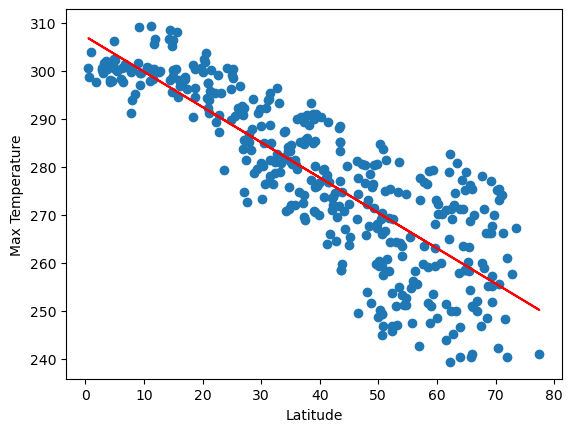

In [15]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]);

The r-value is: 0.5973499595854147
The linear regression line's formula is: y = 0.2818772205446483x + 302.4618469220631


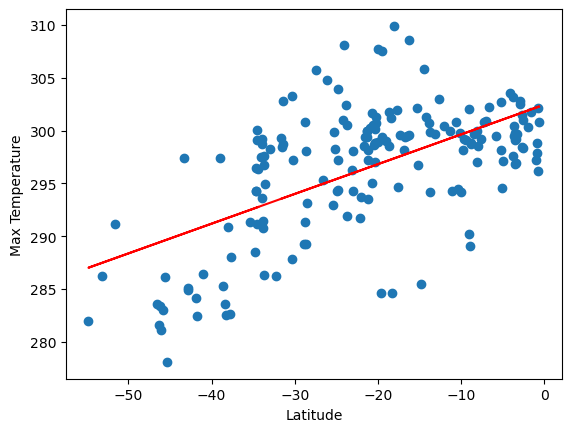

In [16]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"]);

**Discussion about the linear relationship:** The northern hemisphere has a strong negative r-vlaue and the southeren hemisphere has a moderate positive r-value, this shows that as the latitude approaches 0 the temperature typically increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4270455848552368
The linear regression line's formula is: y = 0.469758869035404x + 55.62441097018929


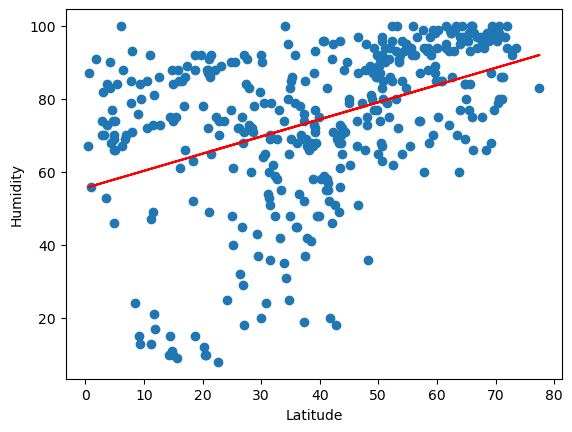

In [17]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")

lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"]);

The r-value is: 0.19581014629476104
The linear regression line's formula is: y = 0.30158829268717363x + 75.01061299240149


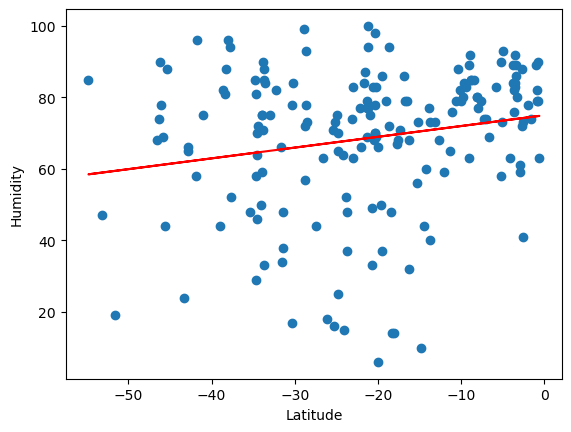

In [18]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")

lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"]);

**Discussion about the linear relationship:** The graphs seem to show that as latitude increases, the humidity increases, however, both graphs have a weak r-value, therefore it could be said that there is little to no relation between latitude and humidity. Also, in the northern hemisphere as latitude increases the humidity values seems to be more concetrated.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19685780311941117
The linear regression line's formula is: y = 0.4092872682250036x + 44.90918564003631


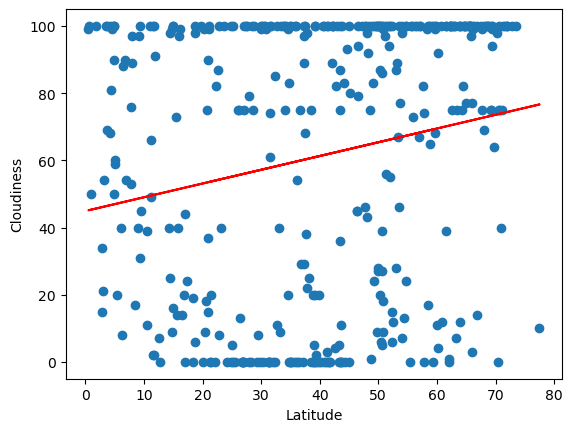

In [19]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"]);

The r-value is: 0.27060429173488443
The linear regression line's formula is: y = 0.8000350814486439x + 75.90353098056974


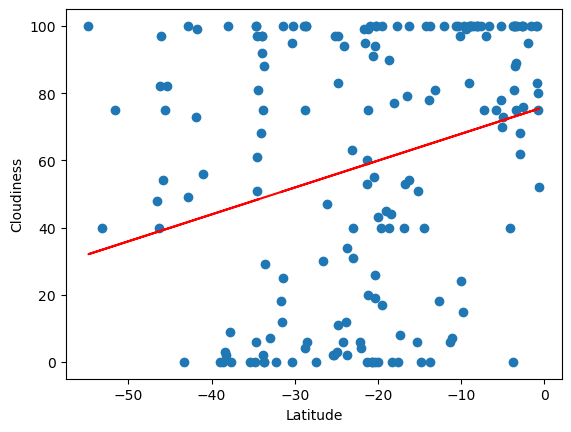

In [20]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"]);

**Discussion about the linear relationship:** Both graphs have a very low r-value, which shows little to no correlation between cloudiness and latitude. Also, from -40 to -20 and 20 to 40 degrees latitude there seems to be many places which no cloudiness (0). Something similar occurs with values at 100 cloudiness, as there is a grouping of them from -20 to 75 degrees latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06322072668211232
The linear regression line's formula is: y = 0.009022718900388178x + 3.392953213109549


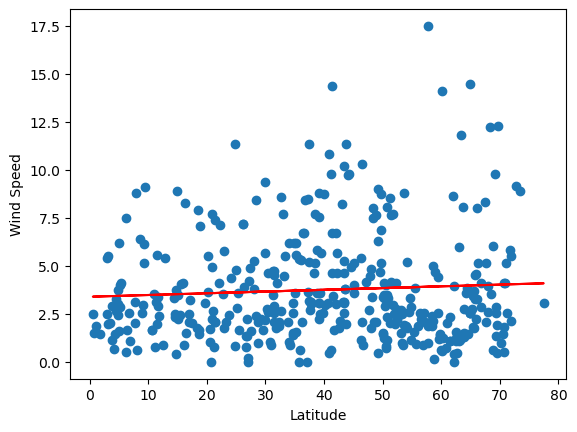

In [21]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"]);

The r-value is: -0.2708673216362259
The linear regression line's formula is: y = -0.0527856833910885x + 2.8325291046064187


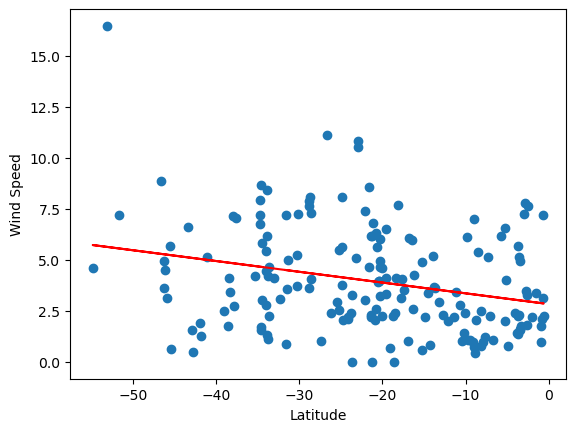

In [22]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"]);

**Discussion about the linear relationship:** The r-values show little to no correlation between wind speed and latitude, however from looking at the graph it seems that the further away from the equator you get, the more the wind speed varies.